 # 產品知覺圖分析（電影）

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline

 ## 資料載入與前處理

 匯入各電影關鍵字熱度資料

In [2]:
keyword_score = pd.read_csv("dataset/allmovie_keywordscore.csv", encoding="utf-8")

 資料整理：將第一列設為索引並移除多餘欄位

In [3]:
keyword_score.index = keyword_score["Unnamed: 0"]
keyword_score.drop(columns=["Unnamed: 0"], inplace=True)

In [4]:
# 顯示處理後的資料
keyword_score.head()

預告  中字  媽媽  官網   刑警  韓國
Unnamed: 0                         
成為王的男人       1   0   0   0    1   0
皇后的品格       26   5   0   8    1  16
赤月青日         8  19  28   6   17   3
神的測驗        14   0  12   6  140  23
死之詠讚         1   0   2   0    0   1

 ## 產品知覺圖（兩個關鍵字示範）

 設定視覺化參數

In [5]:
plt.rcParams["font.sans-serif"] = ["Arial Unicode MS"]  # 用來正常顯示中文標籤
plt.rcParams["axes.unicode_minus"] = False  # 用來正常顯示負號
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

In [6]:
# 顏色列表 - 每個品牌/電影一個顏色
colors = [
    "#ff531a",
    "#f79476",
    "#d9f776",
    "#76d9f7",
    "#9476f7",
    "#ffde58",
    "#5879ff",
    "#79ff58",
    "#de58ff",
    "#ff1a1a",
]

 選擇兩個關鍵字繪製知覺圖

In [7]:
# 準備二個關鍵字(XY資料)
x = keyword_score["預告"]
y = keyword_score["中字"]

# 計算關鍵字聲量的平均
x_avg = x.mean()
y_avg = y.mean()

 繪製產品知覺圖

In [8]:
def plot_perceptual_map(x_data, y_data, x_label, y_label, brands, divider_type="mean"):
    """
    繪製產品知覺圖

    參數:
    x_data: X軸數據
    y_data: Y軸數據
    x_label: X軸標籤
    y_label: Y軸標籤
    brands: 品牌/電影名稱
    divider_type: 分隔線類型 ("mean" 或 "median")
    """
    plt.figure(figsize=(10, 6))

    # 繪製散點圖
    plt.scatter(x_data, y_data, color=colors[: len(x_data)], s=3000, alpha=0.5)

    # 添加品牌/電影名稱標籤
    for i in range(len(x_data)):
        plt.text(x_data[i], y_data[i], brands[i], ha="center", va="center")

    # 計算並繪製分隔線
    if divider_type == "mean":
        x_divider = x_data.mean()
        y_divider = y_data.mean()
        divider_label = "平均值"
    else:  # median
        x_divider = x_data.median()
        y_divider = y_data.median()
        divider_label = "中位數"

    # 繪製分隔線
    plt.axhline(
        y_divider,
        color="c",
        linestyle="dashed",
        linewidth=1.5,
        label=f"Y軸{divider_label}: {y_divider:.2f}",
    )
    plt.axvline(
        x_divider,
        color="c",
        linestyle="dashed",
        linewidth=1.5,
        label=f"X軸{divider_label}: {x_divider:.2f}",
    )

    # 添加象限標籤
    plt.text(x_data.max() * 0.9, y_data.max() * 0.9, "第一象限", ha="center")
    plt.text(x_data.min() * 1.1, y_data.max() * 0.9, "第二象限", ha="center")
    plt.text(x_data.min() * 1.1, y_data.min() * 1.1, "第三象限", ha="center")
    plt.text(x_data.max() * 0.9, y_data.min() * 1.1, "第四象限", ha="center")

    # 設定圖表標題和軸標籤
    plt.title(f"產品知覺圖 {x_label} V.S {y_label} (以{divider_label}分隔)")
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # 顯示圖例
    plt.legend(loc="best")

    # 美化圖表
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

/var/folders/qj/62r8d09n5hn3nm_bdzf0dcpr0000gn/T/ipykernel_54907/2326160698.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x_data[i], y_data[i], brands[i], ha="center", va="center")


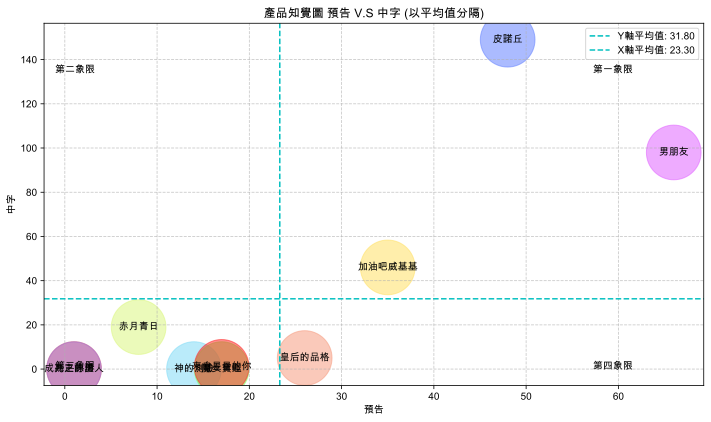

In [9]:
# 使用平均值分隔線繪製知覺圖
plot_perceptual_map(x, y, "預告", "中字", keyword_score.index, "mean")

 ## Question: 使用中位數作為分隔線繪製知覺圖



 修改上面程式，以中位數(median)而非平均值(mean)作為分隔線

/var/folders/qj/62r8d09n5hn3nm_bdzf0dcpr0000gn/T/ipykernel_54907/2326160698.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x_data[i], y_data[i], brands[i], ha="center", va="center")


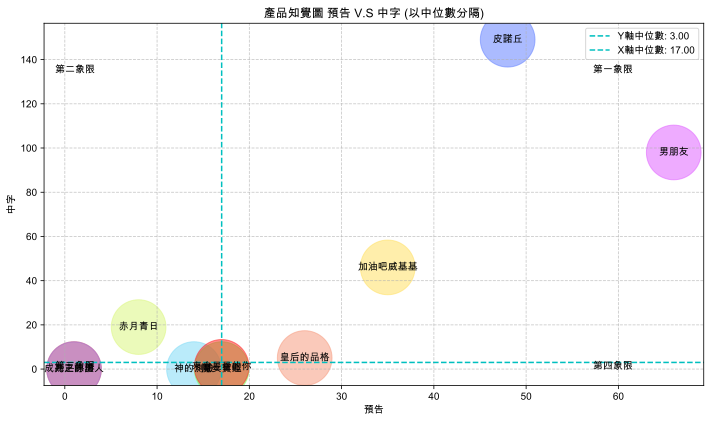

In [10]:
# 使用中位數分隔線繪製知覺圖
plot_perceptual_map(x, y, "預告", "中字", keyword_score.index, "median")

 ## 產品知覺圖（全部關鍵字組合示範）

 繪製所有關鍵字兩兩組合的知覺圖

In [11]:
def plot_all_keyword_combinations(df, divider_type="mean"):
    """
    為資料框中所有關鍵字兩兩組合繪製知覺圖

    參數:
    df: 包含關鍵字熱度的資料框
    divider_type: 分隔線類型 ("mean" 或 "median")
    """
    columns = df.columns
    brands = df.index

    # 對所有可能的關鍵字組合進行迭代
    for i, keyword1 in enumerate(columns):
        for keyword2 in columns[i + 1 :]:  # 避免重複組合和自身比較
            # 繪製知覺圖
            plot_perceptual_map(
                df[keyword1], df[keyword2], keyword1, keyword2, brands, divider_type
            )

/var/folders/qj/62r8d09n5hn3nm_bdzf0dcpr0000gn/T/ipykernel_54907/2326160698.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x_data[i], y_data[i], brands[i], ha="center", va="center")


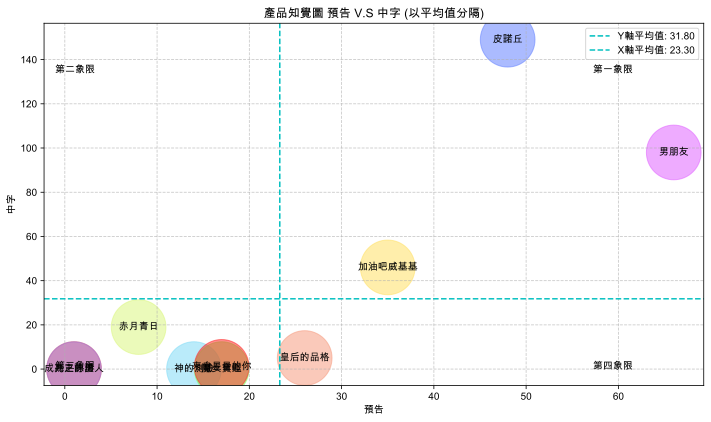

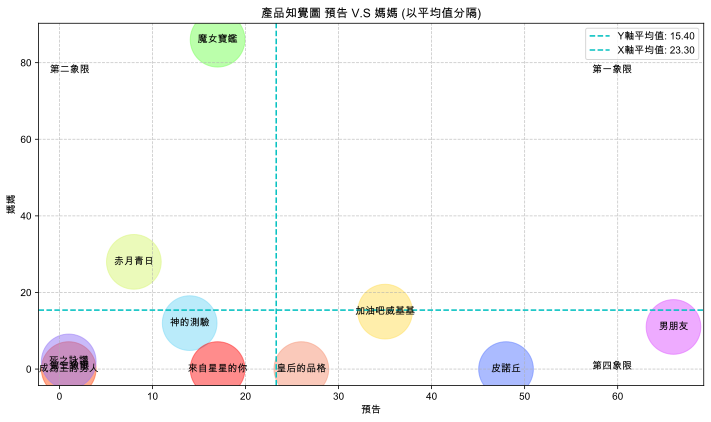

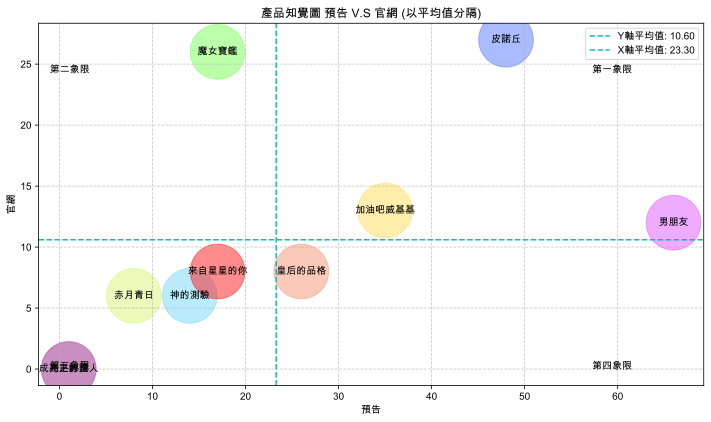

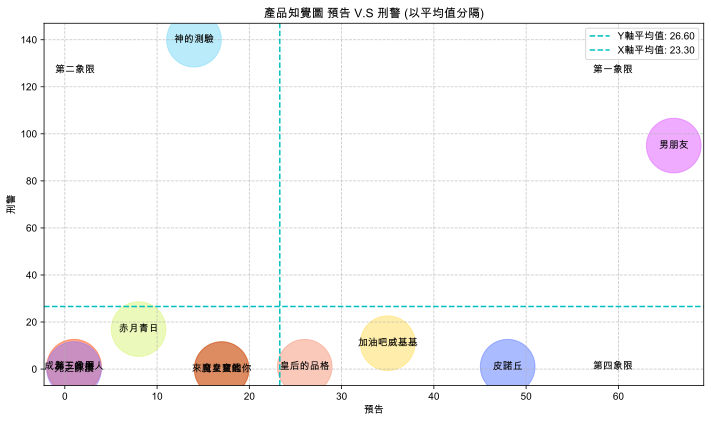

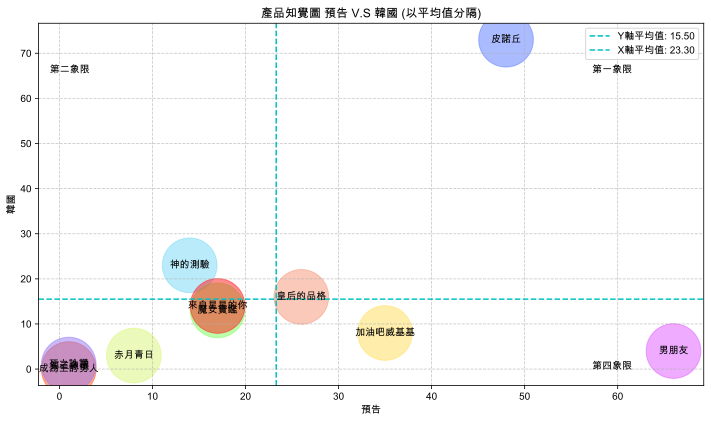

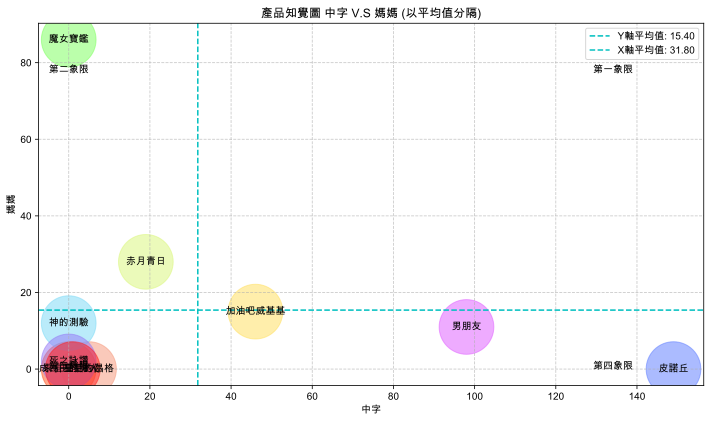

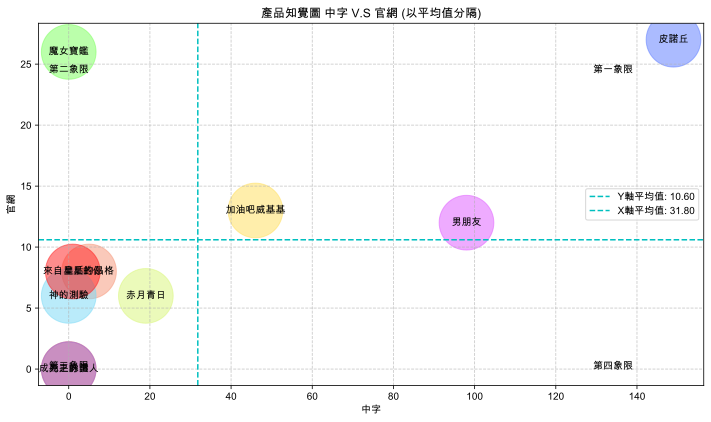

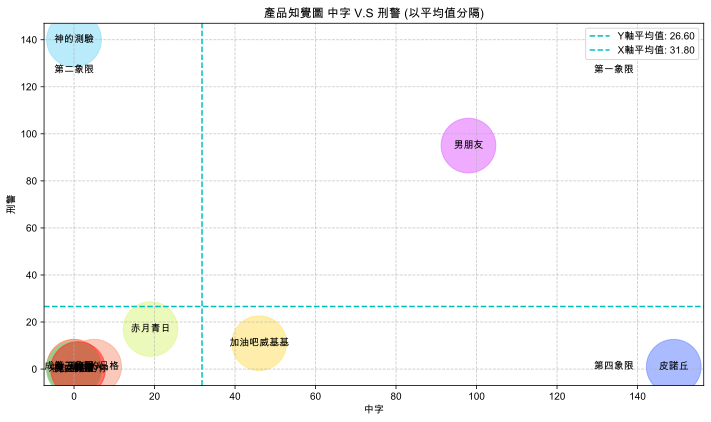

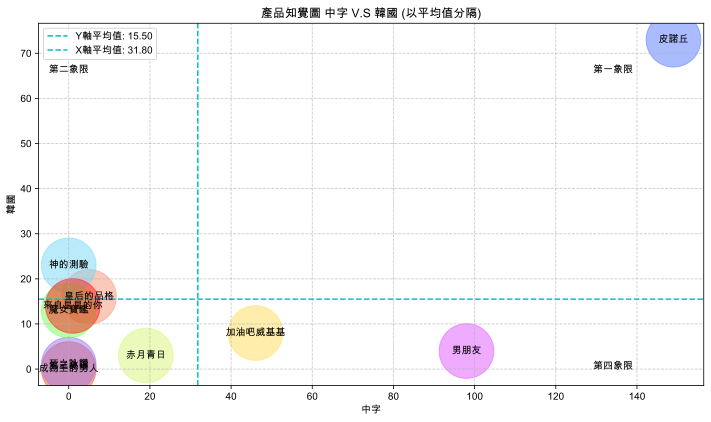

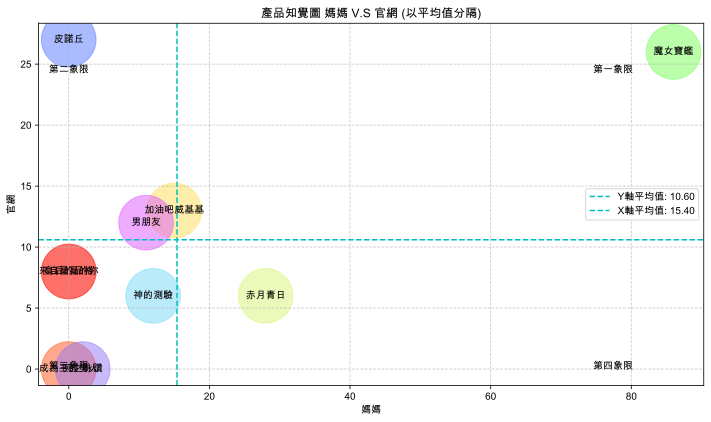

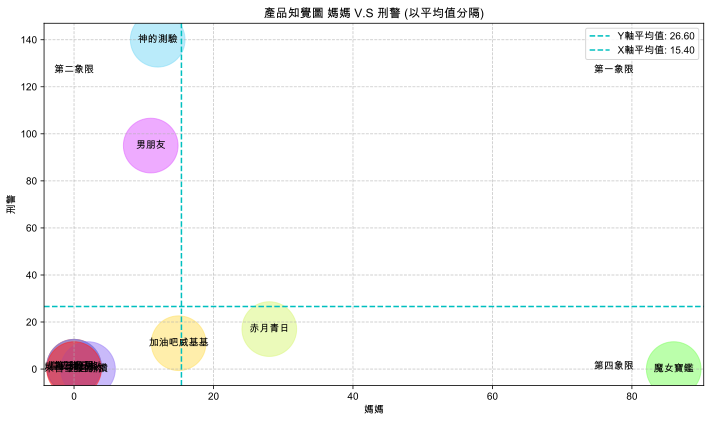

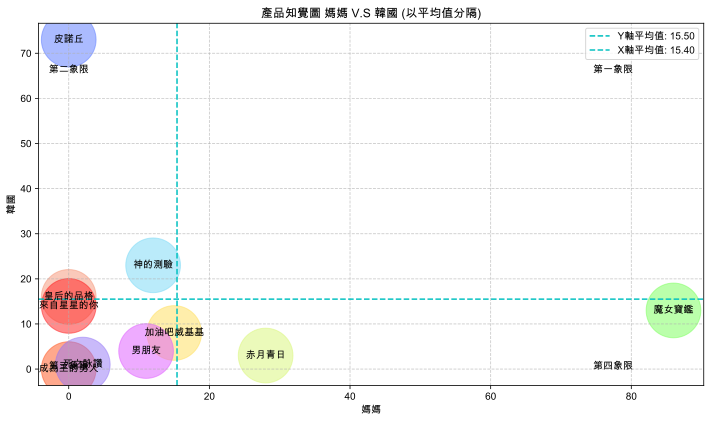

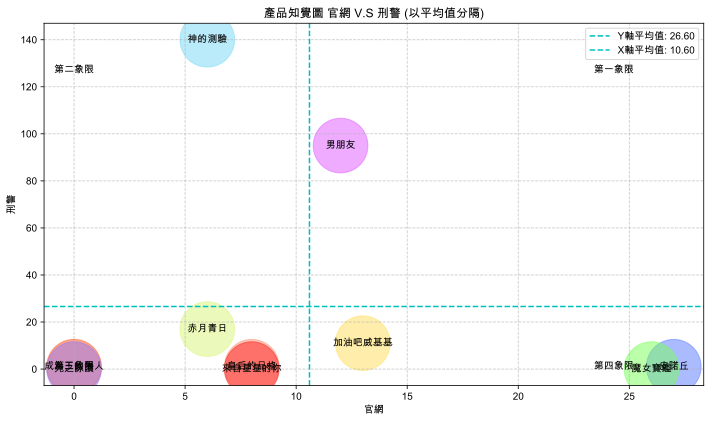

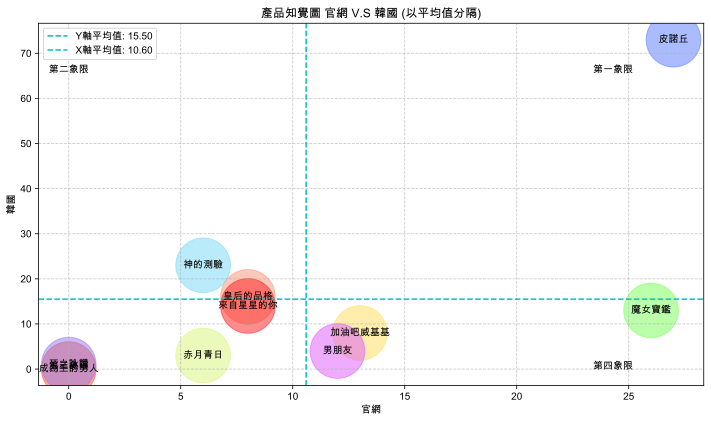

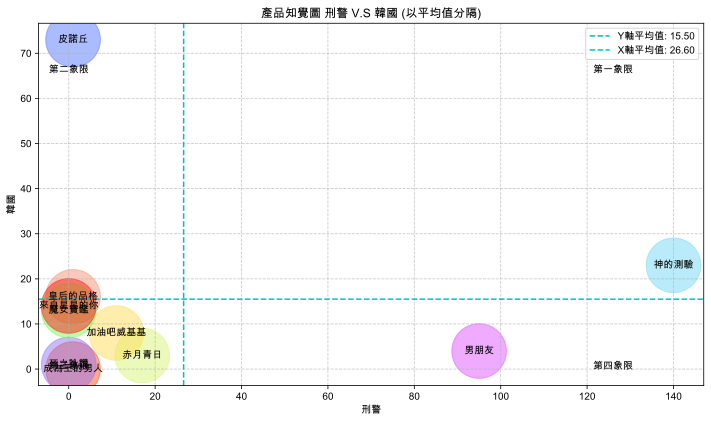

In [12]:
# 使用平均值分隔線繪製所有關鍵字組合的知覺圖
plot_all_keyword_combinations(keyword_score, "mean")

 ## Question: 運動內衣品牌產品知覺圖分析



 請匯入檔案 `allunderwsear_keywordscoredemo.csv`，計算下列品牌的產品知覺圖（全部兩兩為一組的關鍵詞都要）。



 - 運動內衣品牌：[Nike, Shock_Absorber, Adidas, Under_Armour, Triumph, Decathlon, Uniqlo, Calvin_Klein]

 - 自訂關鍵字：['健身', '跑步', '高強度', '無鋼圈', '瑜珈', '舒適']

In [13]:
# 匯入運動內衣品牌關鍵字熱度資料
underwear_score = pd.read_csv(
    "dataset/allunderwsear_keywordscoredemo.csv", encoding="utf-8"
)

In [14]:
# 資料整理
underwear_score.index = underwear_score["Unnamed: 0"]
underwear_score.drop(columns=["Unnamed: 0"], inplace=True)

In [15]:
# 顯示處理後的資料
underwear_score.head()

健身  跑步  高強度  無鋼圈  瑜珈  舒適
Unnamed: 0                              
Nike             0   0    0    0   2   3
Shock_Absorber   3   5    0    0   0  12
Adidas           0   0    0    6   0   0
Under_Armour     0   0    5    0   0   0
Triumph          0   0    0    0   0   3

In [16]:
# 篩選指定的品牌
target_brands = [
    "Nike",
    "Shock_Absorber",
    "Adidas",
    "Under_Armour",
    "Triumph",
    "Decathlon",
    "Uniqlo",
    "Calvin_Klein",
]
filtered_underwear = underwear_score.loc[target_brands]

In [17]:
# 顯示篩選後的資料
filtered_underwear

健身  跑步  高強度  無鋼圈  瑜珈  舒適
Unnamed: 0                              
Nike             0   0    0    0   2   3
Shock_Absorber   3   5    0    0   0  12
Adidas           0   0    0    6   0   0
Under_Armour     0   0    5    0   0   0
Triumph          0   0    0    0   0   3
Decathlon        0   1    0    0   0  14
Uniqlo           0   0    0    0   0   5
Calvin_Klein     0   0    0    0   0   0

 ### 繪製運動內衣品牌的所有關鍵字組合知覺圖

/var/folders/qj/62r8d09n5hn3nm_bdzf0dcpr0000gn/T/ipykernel_54907/2326160698.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x_data[i], y_data[i], brands[i], ha="center", va="center")


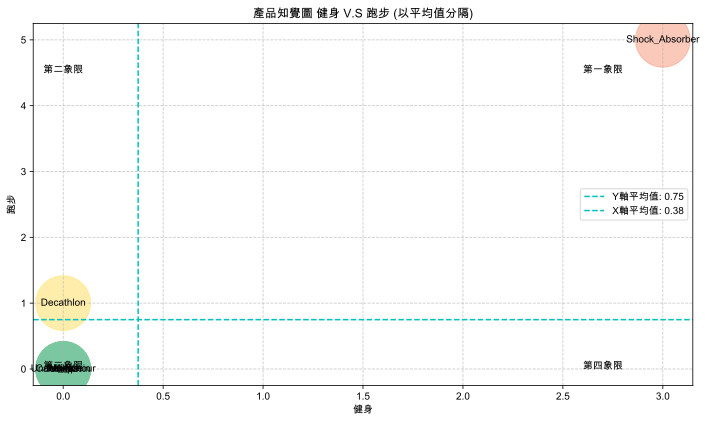

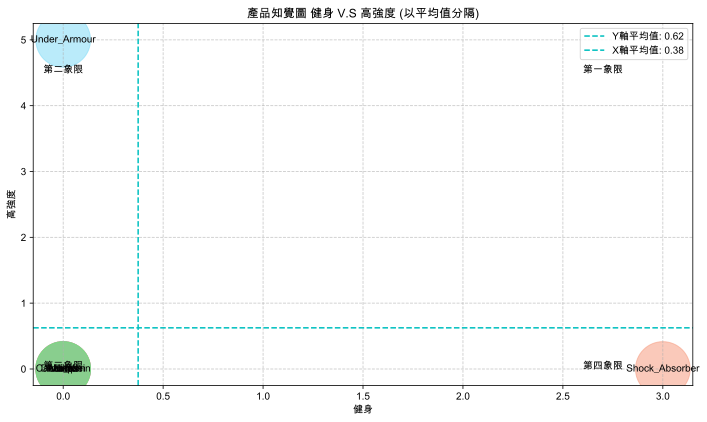

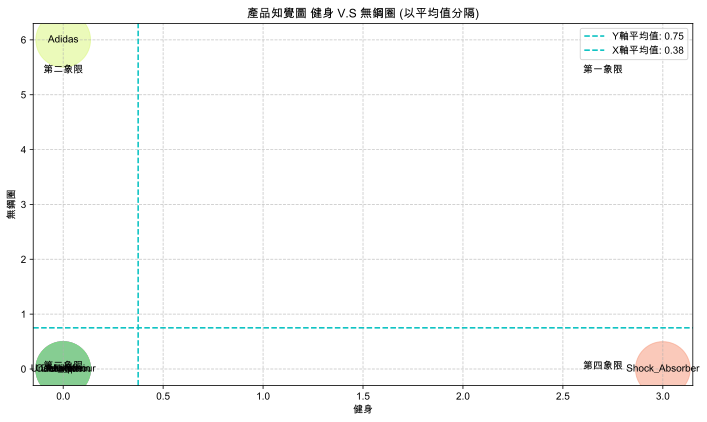

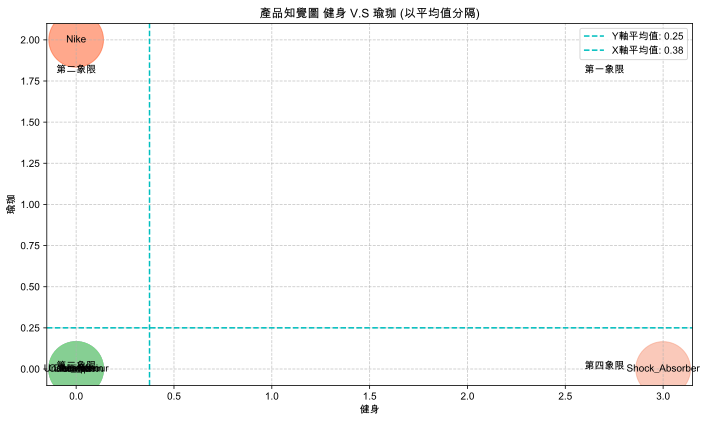

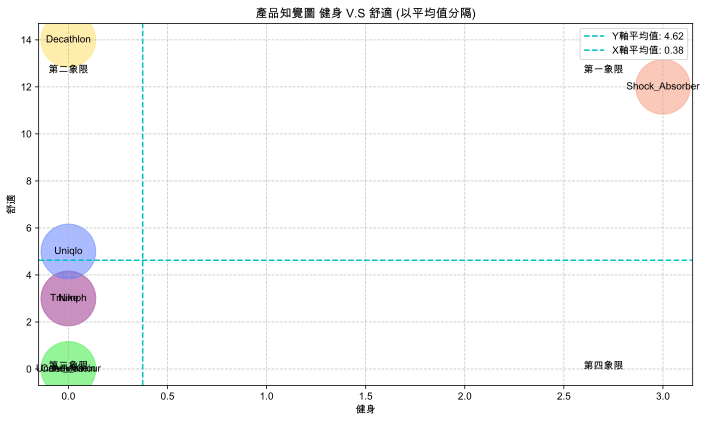

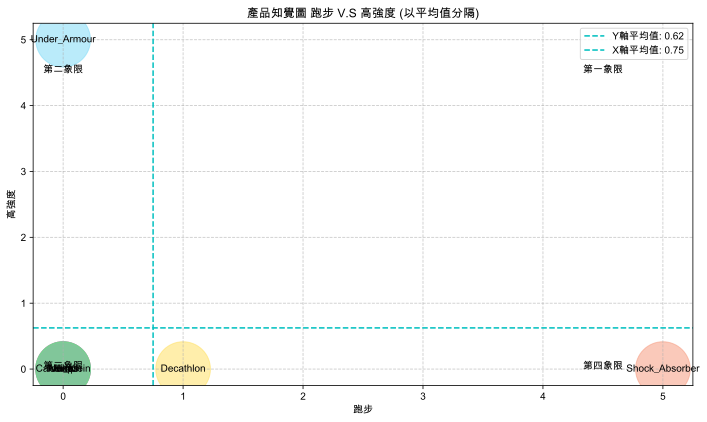

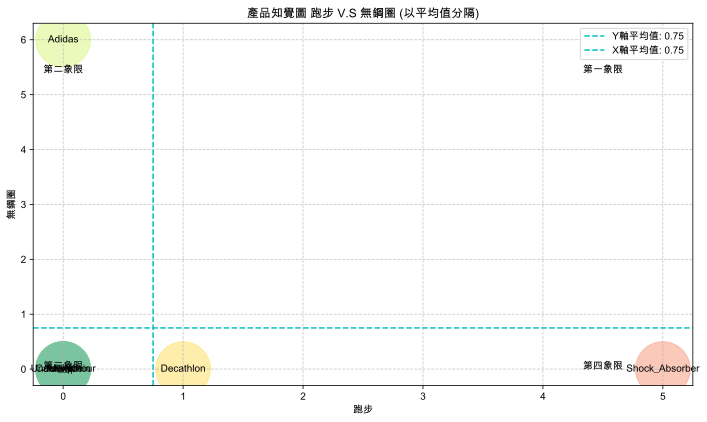

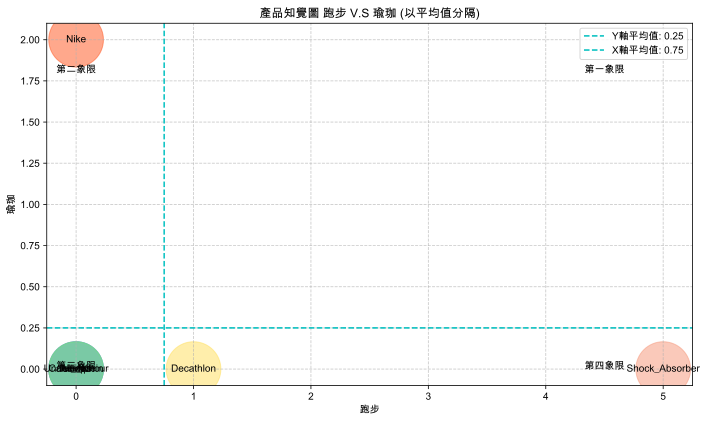

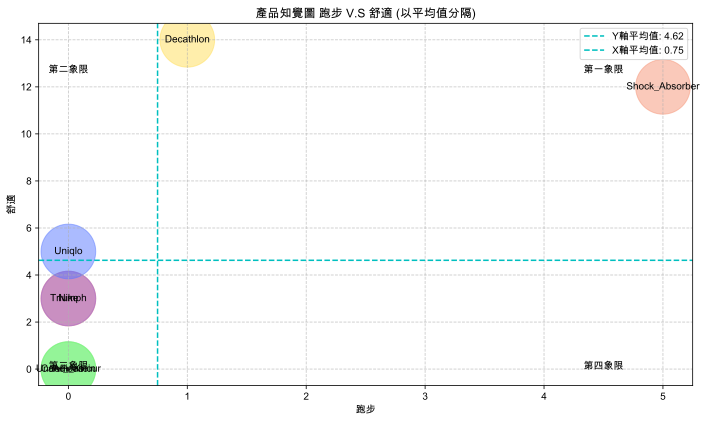

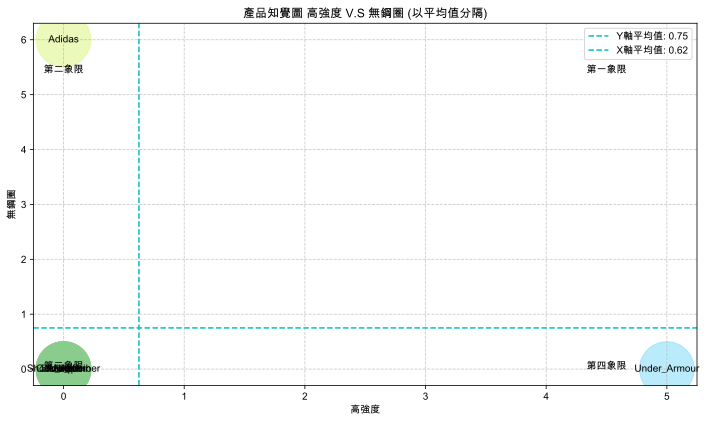

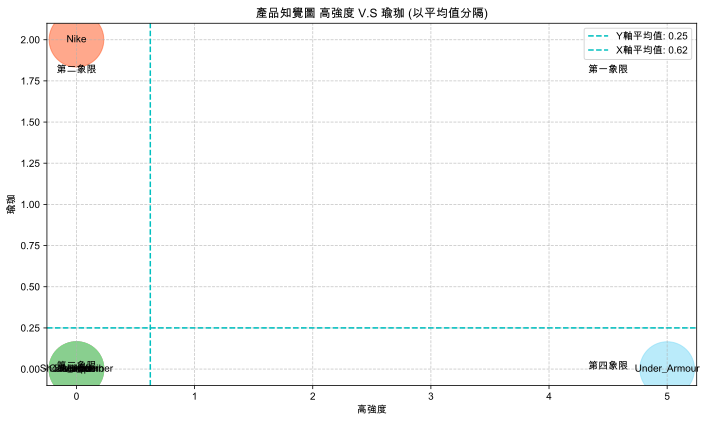

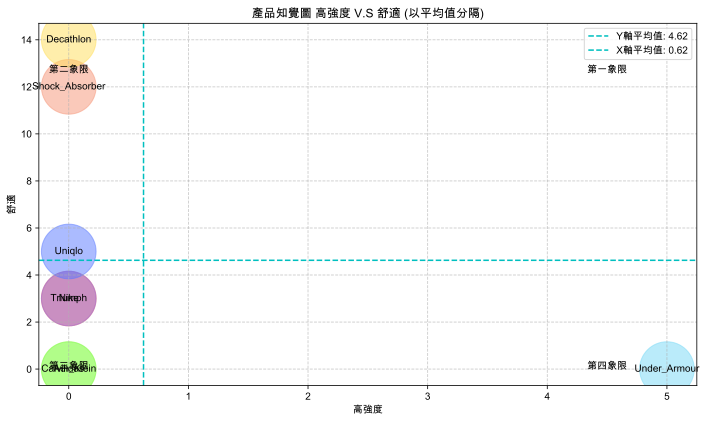

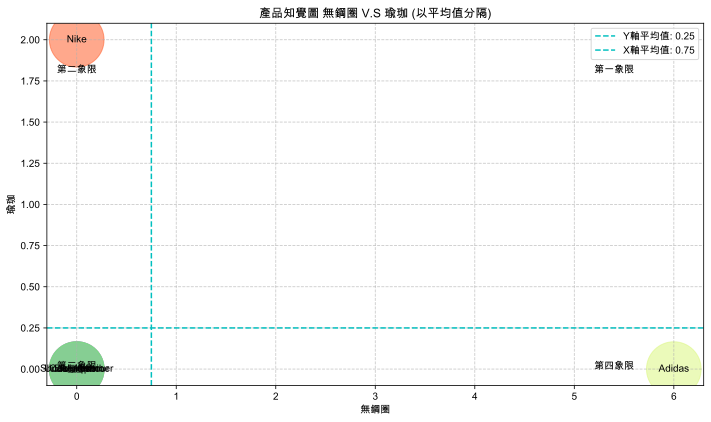

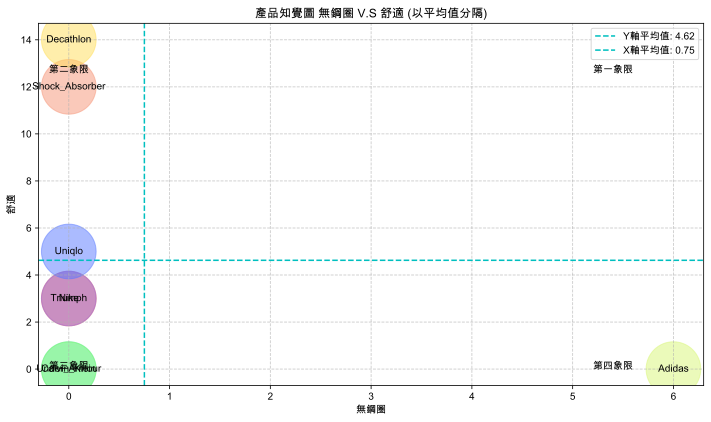

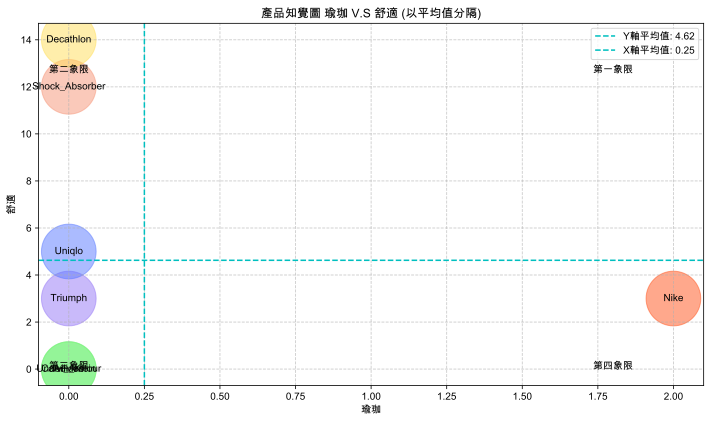

In [18]:
# 使用平均值分隔線繪製所有關鍵字組合的知覺圖
plot_all_keyword_combinations(filtered_underwear, "mean")

 ### 以多維度進行品牌知覺分析 - 主成分分析(PCA)

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [20]:
# 標準化數據
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_underwear)

In [21]:
# 執行PCA降維
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

In [22]:
# 將PCA結果轉換為DataFrame
pca_df = pd.DataFrame(
    data=pca_result, columns=["主成分1", "主成分2"], index=filtered_underwear.index
)

In [23]:
# 顯示PCA結果及各主成分解釋的方差比例
print("各主成分解釋的方差比例:", pca.explained_variance_ratio_)
print("累積解釋的方差比例:", sum(pca.explained_variance_ratio_))
pca_df

各主成分解釋的方差比例: [0.44339505 0.19541551]
累積解釋的方差比例: 0.638810554304545


主成分1      主成分2
Unnamed: 0                        
Nike           -0.799628  2.437209
Shock_Absorber  3.915127 -0.421492
Adidas         -1.320506 -1.251252
Under_Armour   -1.320506 -1.251252
Triumph        -0.456119  0.061603
Decathlon       0.992911  0.333055
Uniqlo         -0.258042  0.123756
Calvin_Klein   -0.753236 -0.031627

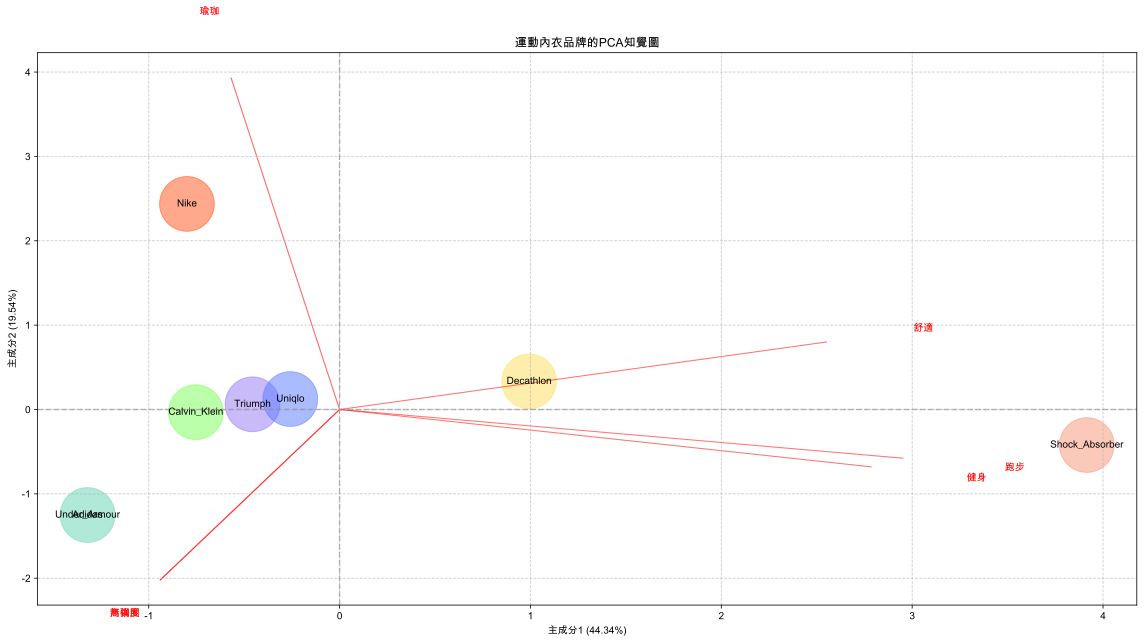

In [36]:
# 繪製PCA知覺圖
plt.figure(figsize=(16, 9))

# 散點圖
plt.scatter(
    pca_df["主成分1"], pca_df["主成分2"], color=colors[: len(pca_df)], s=3000, alpha=0.5
)

# 添加品牌標籤
for i, brand in enumerate(pca_df.index):
    plt.text(
        pca_df["主成分1"].iloc[i], pca_df["主成分2"].iloc[i], brand, ha="center", va="center"
    )

# 繪製原始特徵的投影方向
feature_names = filtered_underwear.columns
for i, feature in enumerate(feature_names):
    coef1 = pca.components_[0, i] * 5  # 放大係數以便顯示
    coef2 = pca.components_[1, i] * 5
    plt.arrow(0, 0, coef1, coef2, color="r", alpha=0.5)
    plt.text(coef1 * 1.2, coef2 * 1.2, feature, color="r", ha="center", va="center")

# 添加坐標軸
plt.axhline(0, color="gray", linestyle="--", alpha=0.5)
plt.axvline(0, color="gray", linestyle="--", alpha=0.5)

# 標題和標籤
plt.title("運動內衣品牌的PCA知覺圖")
plt.xlabel(f"主成分1 ({pca.explained_variance_ratio_[0]:.2%})")
plt.ylabel(f"主成分2 ({pca.explained_variance_ratio_[1]:.2%})")

# 美化圖表
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

 ### 層次聚類分析 - 運動內衣品牌分群

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [26]:
# 執行層次聚類
Z = linkage(scaled_data, method="ward")

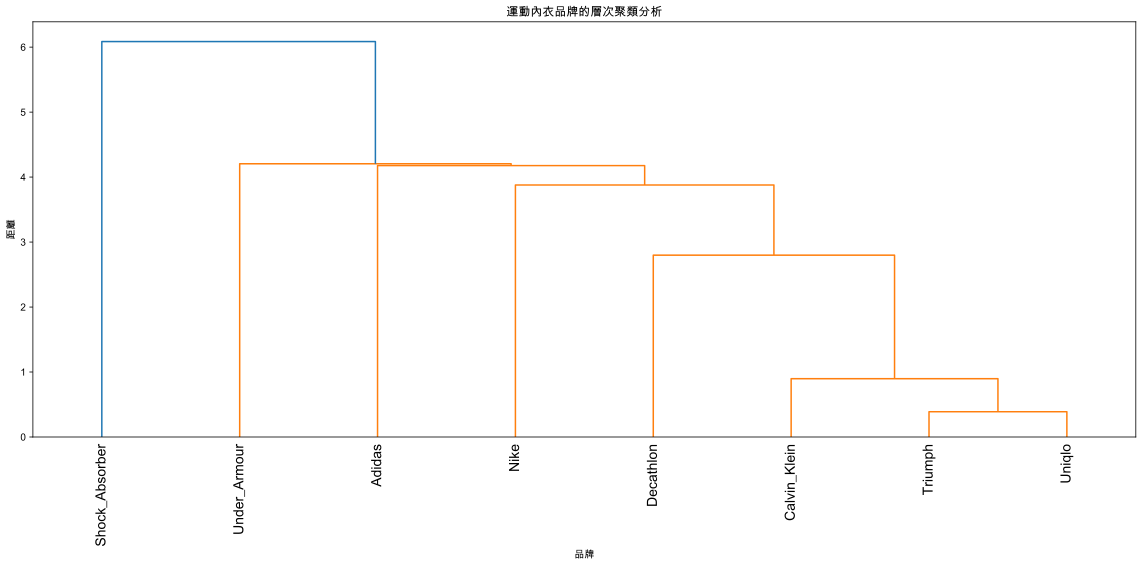

In [27]:
# 繪製樹狀圖
plt.figure(figsize=(16, 8))
dendrogram(Z, labels=filtered_underwear.index, leaf_rotation=90, leaf_font_size=14)
plt.title("運動內衣品牌的層次聚類分析")
plt.xlabel("品牌")
plt.ylabel("距離")
plt.tight_layout()
plt.show()

In [28]:
# 根據樹狀圖結果選擇聚類數量
n_clusters = 3
cluster = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = cluster.fit_predict(scaled_data)

In [29]:
# 將聚類結果添加到PCA圖中
pca_df["聚類"] = cluster_labels

/var/folders/qj/62r8d09n5hn3nm_bdzf0dcpr0000gn/T/ipykernel_54907/152977832.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pca_df["主成分1"][i], pca_df["主成分2"][i], brand, ha="center", va="center"


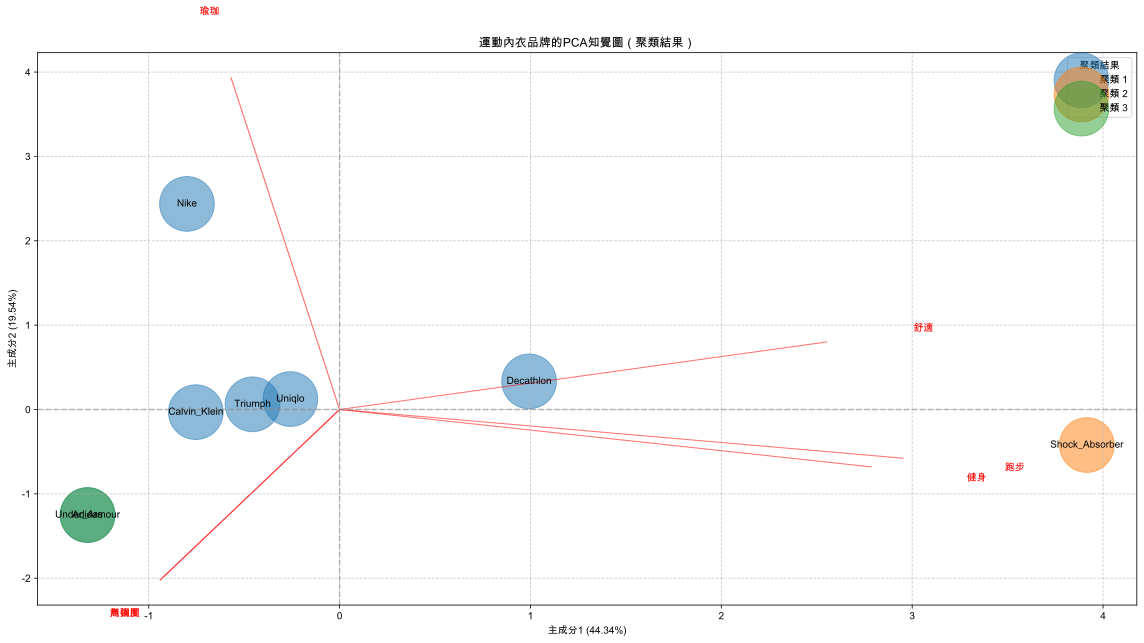

In [30]:
# 繪製PCA知覺圖（帶聚類結果）
plt.figure(figsize=(16, 9))

# 散點圖（根據聚類著色）
for cluster_id in range(n_clusters):
    cluster_points = pca_df[pca_df["聚類"] == cluster_id]
    plt.scatter(
        cluster_points["主成分1"],
        cluster_points["主成分2"],
        label=f"聚類 {cluster_id + 1}",
        s=3000,
        alpha=0.5,
    )

# 添加品牌標籤
for i, brand in enumerate(pca_df.index):
    plt.text(
        pca_df["主成分1"][i], pca_df["主成分2"][i], brand, ha="center", va="center"
    )

# 繪製原始特徵的投影方向
for i, feature in enumerate(feature_names):
    coef1 = pca.components_[0, i] * 5
    coef2 = pca.components_[1, i] * 5
    plt.arrow(0, 0, coef1, coef2, color="r", alpha=0.5)
    plt.text(coef1 * 1.2, coef2 * 1.2, feature, color="r", ha="center", va="center")

# 添加坐標軸
plt.axhline(0, color="gray", linestyle="--", alpha=0.5)
plt.axvline(0, color="gray", linestyle="--", alpha=0.5)

# 標題和標籤
plt.title("運動內衣品牌的PCA知覺圖（聚類結果）")
plt.xlabel(f"主成分1 ({pca.explained_variance_ratio_[0]:.2%})")
plt.ylabel(f"主成分2 ({pca.explained_variance_ratio_[1]:.2%})")
plt.legend(title="聚類結果")

# 美化圖表
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

 ### 品牌聚類結果解釋與分析

In [31]:
# 計算各聚類的平均特徵值
cluster_means = {}
for cluster_id in range(n_clusters):
    cluster_brands = pca_df.index[pca_df["聚類"] == cluster_id]
    cluster_data = filtered_underwear.loc[cluster_brands]
    cluster_means[f"聚類 {cluster_id + 1}"] = cluster_data.mean()

In [32]:
# 轉換為DataFrame並進行可視化
cluster_means_df = pd.DataFrame(cluster_means).T

In [33]:
# 顯示各聚類的平均特徵值
cluster_means_df

健身        跑步  高強度  無鋼圈        瑜珈         舒適
聚類 1  0.0  0.166667  0.0  1.0  0.333333   4.166667
聚類 2  3.0  5.000000  0.0  0.0  0.000000  12.000000
聚類 3  0.0  0.000000  5.0  0.0  0.000000   0.000000

In [34]:
def radar_chart(df, title):
    # 設置雷達圖的維度數量
    categories = df.columns
    N = len(categories)

    # 計算每個維度的角度
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # 閉合圖形

    # 初始化圖形
    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(polar=True))

    # 繪製每個聚類的雷達圖
    for i, row in enumerate(df.index):
        values = df.loc[row].values.tolist()
        values += values[:1]  # 閉合圖形
        ax.plot(angles, values, linewidth=2, linestyle="solid", label=row)
        ax.fill(angles, values, alpha=0.1)

    # 設置標籤
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # 添加圖例與標題
    plt.legend(loc="upper right", bbox_to_anchor=(0.1, 0.1))
    plt.title(title, size=20, pad=20)
    plt.tight_layout()
    plt.show()

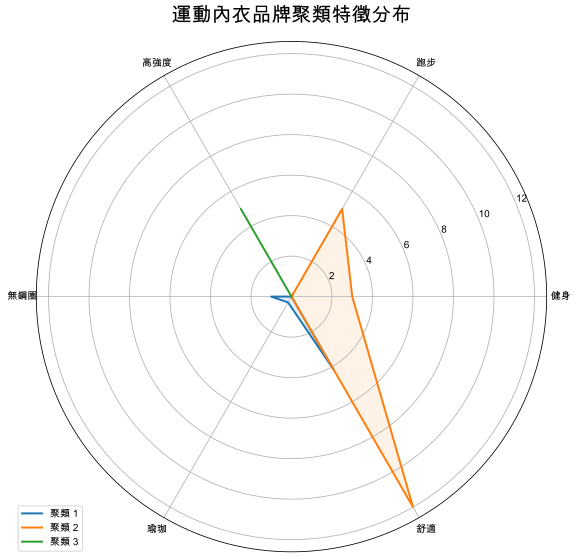

In [35]:
# 繪製聚類的雷達圖
radar_chart(cluster_means_df, "運動內衣品牌聚類特徵分布")